In [1]:
import pandas as pd

## import data

[Human resources in science and technology by sex, country](https://ec.europa.eu/eurostat/en/web/products-eurostat-news/w/ddn-20240613-2).

In [2]:
hrst_st_rsex=pd.read_csv('data/hrst_st_rsex_page_linear.csv')

European health interview survey. [Working hours per week](https://ec.europa.eu/eurostat/en/web/products-eurostat-news/w/ddn-20240530-1).

In [3]:
lfsa_ewhais=pd.read_csv('data/lfsa_ewhais_page_linear.csv')

Purchasing power parities (PPPs), price level indices and real expenditures. [Household consumption, price levels](https://ec.europa.eu/eurostat/en/web/products-eurostat-news/w/ddn-20240620-2).

In [4]:
prc_ppp_ind=pd.read_csv('data/prc_ppp_ind_page_linear.csv')

Enterprises by detailed NACE Rev.2 activity and special aggregates. [People employed in finance and insurance](https://ec.europa.eu/eurostat/en/web/products-eurostat-news/w/ddn-20240610-2).

In [5]:
sbs_ovw_act=pd.read_csv('data/sbs_ovw_act_page_linear.csv')

## process data

In [6]:
pd.DataFrame(hrst_st_rsex.pivot(index='geo',columns='sex',values='OBS_VALUE')['F']/hrst_st_rsex.pivot(index='geo',columns='sex',values='OBS_VALUE')['T'])

,0
geo,
AT,0.500863
BA,0.510067
BE,0.526191
BG,0.582070
CH,0.493922
CY,0.529859
CZ,0.492497
DE,0.519083
DK,0.502393


In [7]:
def process_csv(df):
    return (df
            .query("geo in ('AT','BE','BG','CY','CZ','DE','DK','EE','EL','ES','FI','FR','HR','HU','IE','IT','LT','LU','LV','MT','NL','NO','PL','PT','RO','RS','SE','SI','SK')")
            .set_index('geo')[['OBS_VALUE']]
           )

In [8]:
def normalised(df):
    return (df-df.min())/(df.max()-df.min())


In [9]:
merged_stats=(lfsa_ewhais
 .pipe(process_csv)
 .pipe(normalised)
 .rename(columns={"OBS_VALUE":"weekly_h"})
 .assign(fem_scitech=pd.DataFrame(hrst_st_rsex.pivot(index='geo',columns='sex',values='OBS_VALUE')['F']/hrst_st_rsex.pivot(index='geo',columns='sex',values='OBS_VALUE')['T'])
         .pipe(normalised),
         prices=prc_ppp_ind
        .pipe(process_csv)
        .pipe(normalised),
         financiers=sbs_ovw_act
        .pipe(process_csv)
        .pipe(normalised)
        )
             )
        
              #.reset_index()
              #.query('geo!="EU27_2020"')


In [10]:
merged_stats.dropna()


,weekly_h,fem_scitech,prices,financiers
geo,,,,
AT,0.147368,0.329388,0.104843,0.084115
BE,0.284211,0.462405,0.133622,0.100104
BG,0.715789,0.755865,0.043274,0.030555
CY,0.663158,0.481671,0.004649,0.021477
CZ,0.589474,0.285452,0.083822,0.170359
DE,0.189474,0.425074,1.000000,0.549482
DK,0.221053,0.337424,0.062298,0.105421
EE,0.442105,0.883553,0.006039,0.020405
EL,0.800000,0.470062,0.080706,0.108884


# visualise data

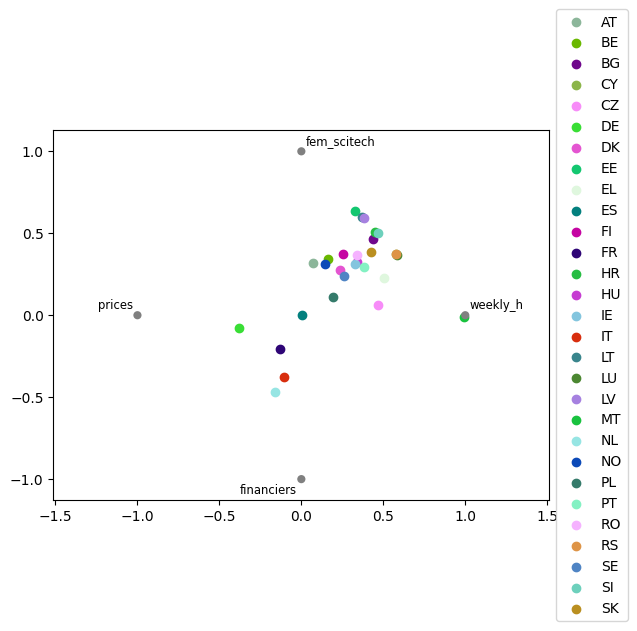

In [11]:
pd.plotting.radviz(merged_stats.dropna().reset_index(),'geo').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))


parallel coordinates crowded for prices and financiers near 0.0-0.2, this corresponds to the bottom left quadrant of the radviz being empty? And likewise busy top right radviz quadrant correspond to the many lines at 0.2-1.0 for weekly hours and females in science and technology. 

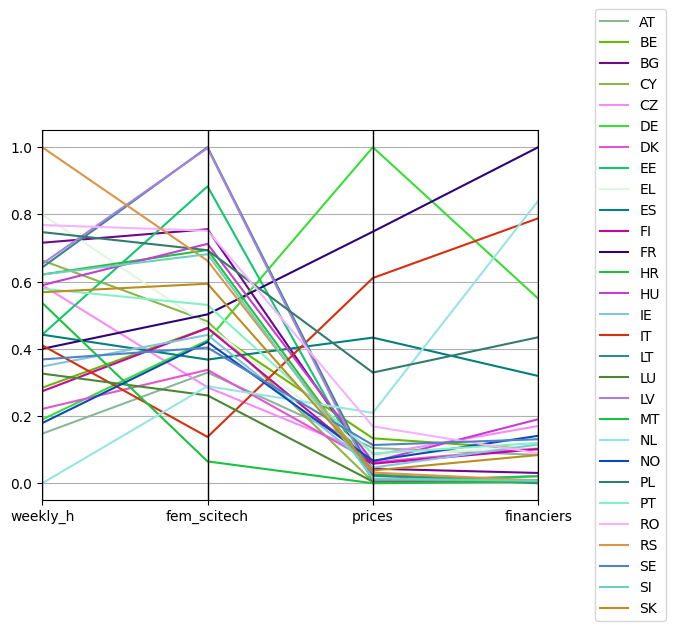

In [13]:
pd.plotting.parallel_coordinates(merged_stats.dropna().reset_index(),'geo').legend(loc='center left',bbox_to_anchor=(1.1, 0.5))

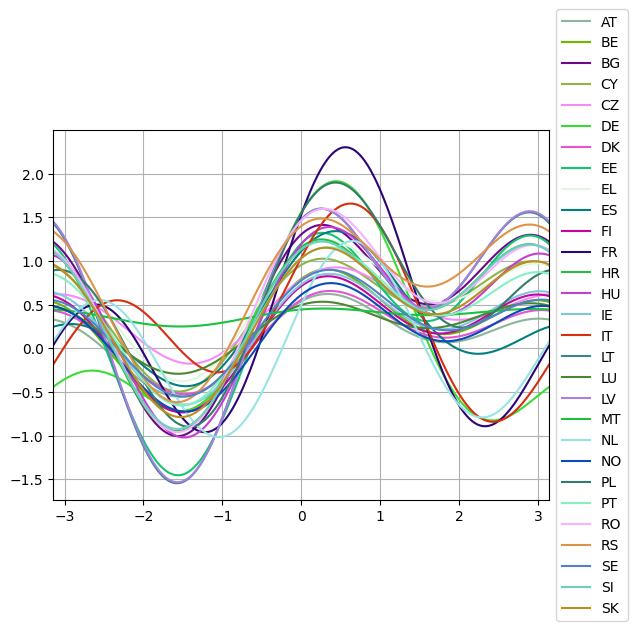

In [14]:
pd.plotting.andrews_curves(merged_stats.dropna().reset_index(),'geo').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

> $ f(t) = \frac{x_1}{\sqrt{2}} + x_2 \sin(t) + x_3 \cos(t) + x_4 \sin(2t) + x_5 \cos(2t) + \cdots $
Where x coefficients correspond to the values of each dimension
and t is linearly spaced between $ -\pi$ and $+\pi$ .
Each row of frame then corresponds to a single curve.

So the first coefficient is the dc component, the next two the in phase and quadrature component of the fundamental, and the next one the in phase component of the first harmonic. 
- The few countries with significant contribution to first harmonic create the trough after 2, which are the same as the ones with high value of people working in finance and insurance.
- Phase differences between the other countries are due to how females in science and technology compares to prices.

In [28]:
#import yellowbrick